#**MNIST Dataset Classification**

##Problem Statement
The Fashion dataset consists of 70,000 images divided into training and test set seperately. Training set consists of 60,000 samples and testing set consistes of 10,000 samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

The 10 classes are as follows:
0 => T-shirt/top 1 => Trouser 2 => Pullover 3 => Dress 4 => Coat 5 => Sandal 6 => Shirt 7 => Sneaker 8 => Bag 9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.


![MNIST Dataset Images](https://4.bp.blogspot.com/-OQZGt_5WqDo/Wa_Dfa4U15I/AAAAAAAAAUI/veRmAmUUKFA19dVw6XCOV2YLO6n-y_omwCLcBGAs/s1600/out.jpg)

##Imporing Data

In [0]:
# importing libraries 
import pandas as pd # importing pandas for data manipulation using dataframes
import numpy as np # importing numpy for data statistical analysis 
import matplotlib.pyplot as plt # importing matplotlib and seaborn for data visualisation
import seaborn as sns
import random

In [0]:
# dataframes creation for both training and testing datasets 
fashion_train = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test = pd.read_csv('fashion-mnist_test.csv', sep = ',')

##Exploratory Data Analysis and Visualization

In [69]:
# viewing the head of the training dataset
# columns ranges from pixel1 to pixel784 which indicates 28x28 pixels picture and target coloumn is label
# pixel values ranges from 0 to 255 depicting the lightness or darkness of that pixel, with higher numbers meaning darker
fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# check the shape of the training dataset
fashion_train.shape

(60000, 785)

In [71]:
# viewing the head of the test dataset
fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# check the shape of the test dataset
fashion_test.shape

(10000, 785)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


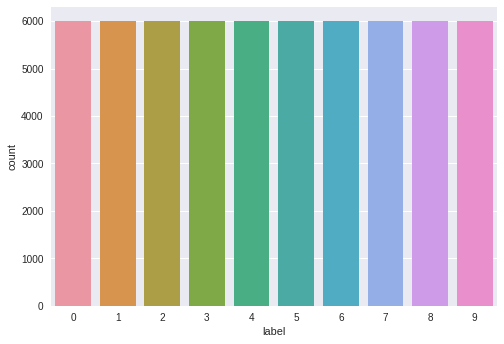

In [73]:
# lets see the number of records present for each category
sns.countplot(x='label',data=fashion_train)

In [74]:
fashion_train['label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

###Each classes have equal number of label in each category. This shows the dataset is balanced and perfect for trainung the model.

In [0]:
# creating arrays for the training and testing data as the model will be accepting the arrays instead of dataframes
training = np.array(fashion_train, dtype = 'float32')
testing = np.array(fashion_test, dtype='float32')

Label value:  1.0


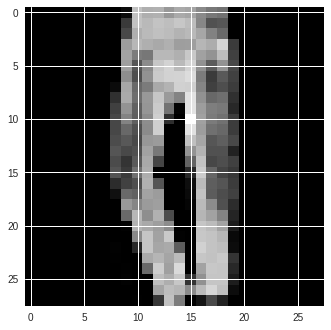

In [76]:
# visualizing some more images randomly!
i = random.randint(1,60000) # select any random index from 1 to 60,000

plt.imshow( training[i,1:].reshape((28,28)), cmap = 'gray') # reshape and plot the image
print('Label value: ',training[i,0])


# the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

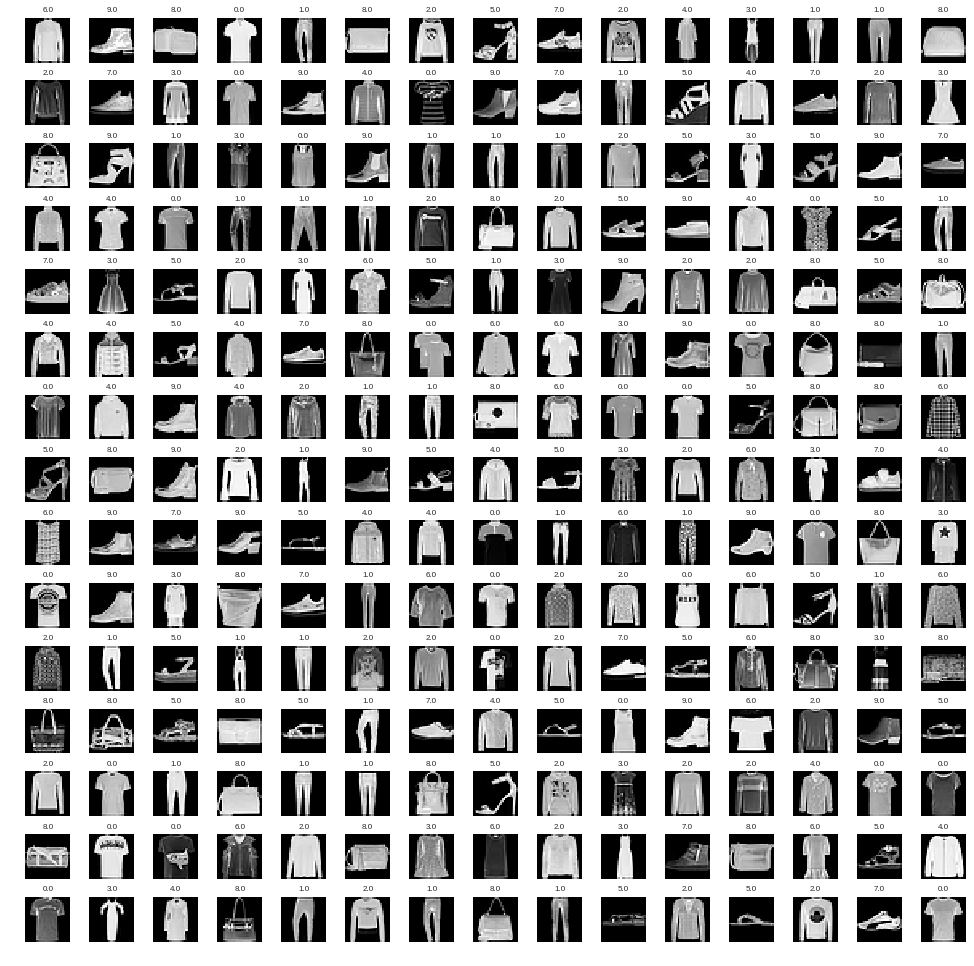

In [77]:
# viewing more images in a grid format
# defining the dimensions of  grid 
width_grid = 15
length_grid = 15

# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(length_grid, width_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# creating loop for plotting width_grid * length_grid i,e,. 15*15 = 225 images
for i in np.arange(0, width_grid * length_grid): # create evenly spaces variables 

    # selecting a random number between 0 and n_training
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( training[index,1:].reshape((28,28)), cmap = 'gray' )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
#plt.tight_layout()
# the 10 classes decoding is as follows:
# 0 => T-shirt/top
# 1 => Trouser
# 2 => Pullover
# 3 => Dress
# 4 => Coat
# 5 => Sandal
# 6 => Shirt
# 7 => Sneaker
# 8 => Bag
# 9 => Ankle boot

##Training the Model

In [0]:
# preparing the training and testing dataset to have pixel values between 0 and 1. (Rescaling the data) 
X_train = training[:,1:]/255
y_train = training[:,0]

X_test = testing[:,1:]/255
y_test = testing[:,0]

In [0]:
# performing the train test split for model fitting to have the validation data
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [80]:
print('Shape of training set is: {a}\nShape of training target set is: {b}'.format(a=X_train.shape,b=y_train.shape))
print('Shape of validation set is: {a}\nShape of validation target set is: {b}'.format(a=X_validate.shape,b=y_validate.shape))

Shape of training set is: (48000, 784)
Shape of training target set is: (48000,)
Shape of validation set is: (12000, 784)
Shape of validation target set is: (12000,)


In [81]:
# preparing the dataset input such that it is acceptable by the classifier model
# i,e,. shape: number of images, width, height, number of channels
# number of channels for a black and white image is 1 whereas for a colored image it is 3 (R, G, B)
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))
print('Shape of training set is: {}'.format(X_train.shape))
print('Shape of test set is: {}'.format(X_test.shape))
print('Shape of validation set is: {}'.format(X_validate.shape))

Shape of training set is: (48000, 28, 28, 1)
Shape of test set is: (10000, 28, 28, 1)
Shape of validation set is: (12000, 28, 28, 1)


In [0]:
# importing keras, the open source neural network library which we will use to train our model
# this library is great when working with the image classification as it is easy to understand and simple to use.
import keras 

In [0]:
# importing other libraries from feras which will be used for constructing the model
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [0]:
# sequential class is the stepping stone for creation of the model
classifier = Sequential()

# adding the layers in the model such as Convlotional 2D, Pooling (here Max Pooling), Dropout, Flattening and Dense
classifier.add(Conv2D(64,(3, 3), input_shape = (28,28,1), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Dropout(0.25)) # adding the dropout for regularization

# classifier.add(Conv2D(32,3, 3, activation='relu'))
# classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten()) # flattening the convolutional layer such that it is accepted as an input to ANN
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'sigmoid'))

In [85]:
# displaying the summary of the model
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                346144    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 347,114
Trainable params: 347,114
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compiling the model
classifier.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [87]:
epoch = 50    # defining the epochs. i,e,. the number of times the model will the the training data

classifier.fit(X_train,
               y_train,
               batch_size = 512,
               epochs = epoch,
               verbose = 1,
               validation_data = (X_validate, y_validate))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 63us/step - loss: 0.7844 - acc: 0.7441 - val_loss: 0.4679 - val_acc: 0.8398
Epoch 2/50
48000/48000 [==============================] - 2s 52us/step - loss: 0.4337 - acc: 0.8486 - val_loss: 0.4020 - val_acc: 0.8621
Epoch 3/50
48000/48000 [==============================] - 3s 53us/step - loss: 0.3861 - acc: 0.8649 - val_loss: 0.3655 - val_acc: 0.8743
Epoch 4/50
48000/48000 [==============================] - 2s 52us/step - loss: 0.3576 - acc: 0.8757 - val_loss: 0.3460 - val_acc: 0.8832
Epoch 5/50
48000/48000 [==============================] - 2s 51us/step - loss: 0.3334 - acc: 0.8833 - val_loss: 0.3250 - val_acc: 0.8878
Epoch 6/50
48000/48000 [==============================] - 2s 52us/step - loss: 0.3219 - acc: 0.8878 - val_loss: 0.3301 - val_acc: 0.8849
Epoch 7/50
48000/48000 [==============================] - 2s 51us/step - loss: 0.3087 - acc: 0.8919 - val_loss: 0.3054 - val_acc

##Evaluating the Model

In [88]:
# evaluating the model against the test data
evaluation = classifier.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 78us/step
Test Accuracy : 0.920


In [0]:
# get the predictions for the test data
predicted_classes = classifier.predict_classes(X_test)

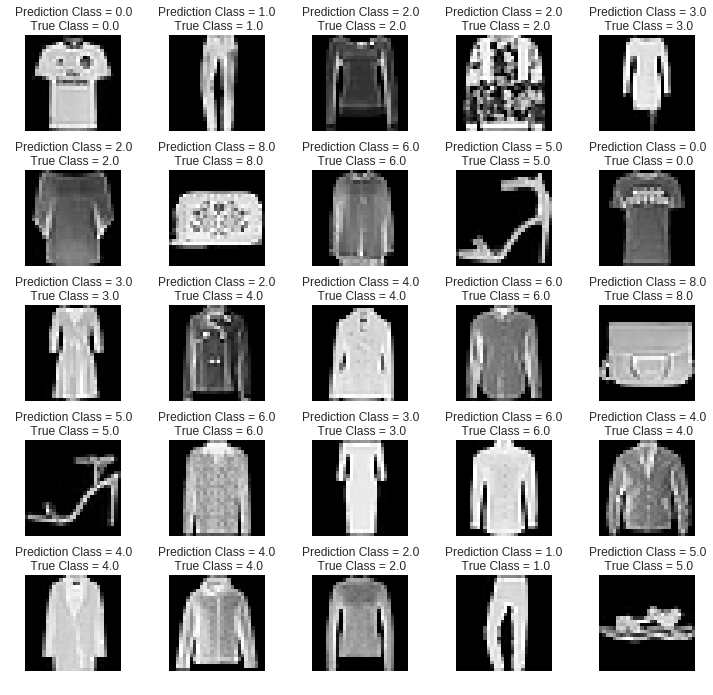

In [90]:
# plotting some images from test data with their true labels and predicted labels
length = 5
width = 5
fig, axes = plt.subplots(length, width, figsize = (12,12))
axes = axes.ravel() 

for i in np.arange(0, length * width):  
    axes[i].imshow(X_test[i].reshape(28,28), cmap = 'gray')
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

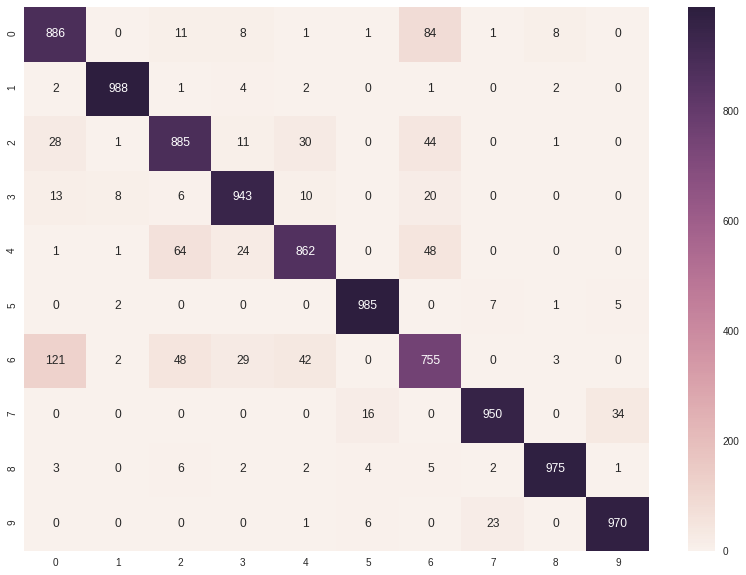

In [91]:
# plotting the confusion matrix to analyse the results better
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True, fmt='g')

In [92]:
# classification report
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

             precision    recall  f1-score   support

    Class 0       0.84      0.89      0.86      1000
    Class 1       0.99      0.99      0.99      1000
    Class 2       0.87      0.89      0.88      1000
    Class 3       0.92      0.94      0.93      1000
    Class 4       0.91      0.86      0.88      1000
    Class 5       0.97      0.98      0.98      1000
    Class 6       0.79      0.76      0.77      1000
    Class 7       0.97      0.95      0.96      1000
    Class 8       0.98      0.97      0.98      1000
    Class 9       0.96      0.97      0.97      1000

avg / total       0.92      0.92      0.92     10000



The Classes are shown with their labels
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot



*   We can see from the classification report that most of the classes have a pretty good precision, recall and f1 score. The only class which suffers from bad results is class 6 i,e,. Shirt.
*   From confusion matrix it is clear that class 6 i,e,. Shirt is sometimes predicted to be class 0 i,e,. Trousers.

*   This error can be prevented if we train our model with more sample data such that it learns better to classify the above two mentioned classes properly and thus the misclassification rate can be reduced.

*   One such way is to create synthetic data from the input data and train our model on those data as well. It will not only improve the accuracies in predicting all the classes well but also will make our model robust.
*   In the nex section, we will be implementing the classification of MNIST Fashion images with our these synthetic data. 


*   For creating synthetic data we will be using the Keras ImageDataGenerator class from Keras Image Preprocessing documentation. This is much more efficient in creating synthetic data.












#MNIST Fashion Image Synthesis (Creating Synthetic Data)

In [0]:
# importing the data generator library
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# recreating the same classifer to train it on the synthetic data
classifier = Sequential()

# adding the layers in the model such as Convlotional 2D, Pooling (here Max Pooling), Dropout, Flattening and Dense
classifier.add(Conv2D(64,(3, 3), input_shape = (28,28,1), activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Dropout(0.25)) # adding the dropout for regularization

# classifier.add(Conv2D(32,3, 3, activation='relu'))
# classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten()) # flattening the convolutional layer such that it is accepted as an input to ANN
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(Dense(units = 10, activation = 'sigmoid'))

# compiling the model
classifier.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [95]:
# training the model
shift_fraction = 0.005
batch_size = 32
epoch = 50

# creating the synthetic data using data generator class
gen = ImageDataGenerator(width_shift_range=shift_fraction,height_shift_range=shift_fraction,horizontal_flip=True)
batches = gen.flow(X_train, y_train, batch_size=batch_size)
val_batches = gen.flow(X_validate, y_validate, batch_size=batch_size)

fashion_train=classifier.fit_generator(batches, steps_per_epoch=X_train.shape[0]//batch_size, epochs=epoch,validation_data=val_batches, 
                                                   validation_steps=X_validate.shape[0]//batch_size, use_multiprocessing=True)
                                                   

Epoch 1/50
1500/1500 [==============================] - 23s 15ms/step - loss: 0.5469 - acc: 0.8051 - val_loss: 0.4188 - val_acc: 0.8483
Epoch 2/50
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3675 - acc: 0.8714 - val_loss: 0.3393 - val_acc: 0.8798
Epoch 3/50
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3281 - acc: 0.8844 - val_loss: 0.3231 - val_acc: 0.8811
Epoch 4/50
1500/1500 [==============================] - 22s 15ms/step - loss: 0.3035 - acc: 0.8923 - val_loss: 0.2958 - val_acc: 0.8958
Epoch 5/50
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2849 - acc: 0.8993 - val_loss: 0.2855 - val_acc: 0.8989
Epoch 6/50
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2710 - acc: 0.9033 - val_loss: 0.2860 - val_acc: 0.8982
Epoch 7/50
1500/1500 [==============================] - 22s 15ms/step - loss: 0.2589 - acc: 0.9058 - val_loss: 0.2819 - val_acc: 0.8979
Epoch 8/50
1500/1500 [==========================

##Evaluating the Model

In [98]:
# evaluating the model against the test data
evaluation = classifier.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 84us/step
Test Accuracy : 0.912


In [0]:
# get the predictions for the test data
predicted_classes = classifier.predict_classes(X_test)

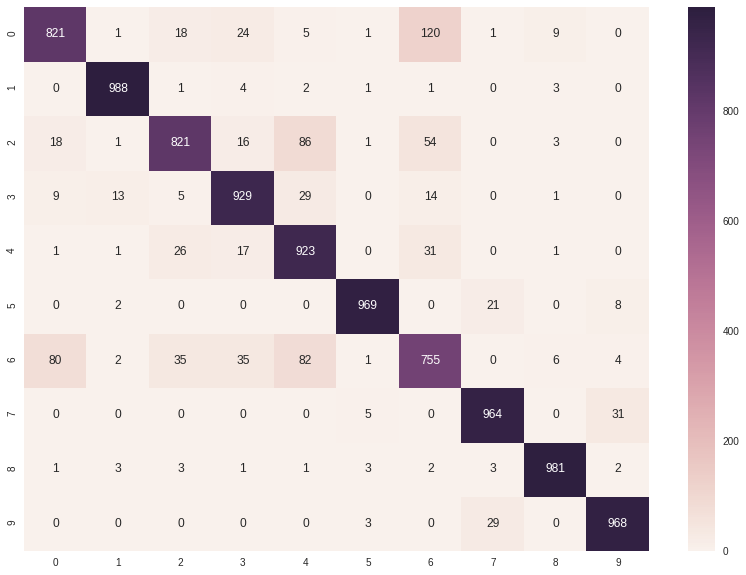

In [100]:
# plotting the confusion matrix to analyse the results better
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True, fmt='g')

In [101]:
# classification report
from sklearn.metrics import classification_report

num_classes = 10
target_names = ['Class 0 - T-shirt/top', 'Class 1 - Trouser', 'Class 2 - Pullover', 'Class 3 - Dress', 'Class 4 - Coat', 'Class 5 - Sandal', 'Class 6 - Shirt',
                'Class 7 - Sneaker', 'Class 8 - Bag', 'Class 9 - Ankle boot']

print(classification_report(y_test, predicted_classes, target_names = target_names))

                       precision    recall  f1-score   support

Class 0 - T-shirt/top       0.88      0.82      0.85      1000
    Class 1 - Trouser       0.98      0.99      0.98      1000
   Class 2 - Pullover       0.90      0.82      0.86      1000
      Class 3 - Dress       0.91      0.93      0.92      1000
       Class 4 - Coat       0.82      0.92      0.87      1000
     Class 5 - Sandal       0.98      0.97      0.98      1000
      Class 6 - Shirt       0.77      0.76      0.76      1000
    Class 7 - Sneaker       0.95      0.96      0.96      1000
        Class 8 - Bag       0.98      0.98      0.98      1000
 Class 9 - Ankle boot       0.96      0.97      0.96      1000

          avg / total       0.91      0.91      0.91     10000



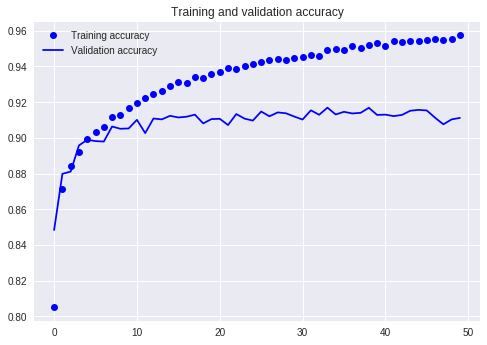

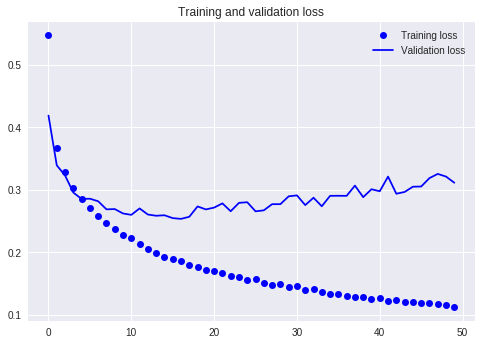

In [116]:
# extract metrics for plotting
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))

# plots
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



*   We can still see from the classification report that most of the classes have a pretty good precision, recall and f1 score. The only class which suffers from bad results is class 6 i,e,. Shirt.
*   From confusion matrix it is clear that class 6 i,e,. Shirt is still having a pretty low score

*   This error can be due to the fact that shirt (class 6) and t-shirt (class 0) have almost same aesthetics and can be hard for neural network to disassociate between them. 


*   We can see from the graphs of training and validation accuracy that the after certain number of epochs the validation accuracy and the training loss become constant and have no impact even though the network seems to learn better on the training set.


**Therefore, the final accuracy acheived on the test set is 91.20%**